In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import control as ctl
import ast

from utils import BandFilter, Integral, LowBandFilter, NumpyFilter

# IMPORTANDO DADOS

In [52]:
df = pd.read_csv('DataBase.csv')
df

,time,s2,s3,s1
0,118.222,"{'ax': -4.905719, 'ay': 5.509058, 'wz': -0.019...","{'ax': -4.924873, 'ay': 5.494693, 'wz': -0.017...","{'ax': 13091, 'ay': 13267, 'wz': 12883, 'az': ..."
1,118.242,"{'ax': -5.030218, 'ay': 5.437232, 'wz': -0.025...","{'ax': -4.924873, 'ay': 5.398925, 'wz': -0.000...","{'ax': 13219, 'ay': 13363, 'wz': 13043, 'az': ..."
2,118.262,"{'ax': -5.006276, 'ay': 5.463568, 'wz': -0.001...","{'ax': -5.020641, 'ay': 5.489904, 'wz': -0.000...","{'ax': 13331, 'ay': 13475, 'wz': 13155, 'az': ..."
3,118.282,"{'ax': -4.905719, 'ay': 5.41329, 'wz': -0.0215...","{'ax': -4.905719, 'ay': 5.41329, 'wz': -0.0182...","{'ax': 13331, 'ay': 13475, 'wz': 13123, 'az': ..."
4,118.302,"{'ax': -4.910508, 'ay': 5.513846, 'wz': -0.017...","{'ax': -5.032612, 'ay': 5.513846, 'wz': -0.025...","{'ax': 13171, 'ay': 13363, 'wz': 12979, 'az': ..."
...,...,...,...,...
6876,264.516,"{'ax': -5.528212, 'ay': 0.9935937, 'wz': -0.02...","{'ax': -5.518635, 'ay': 1.070208, 'wz': -0.029...","{'ax': 11650, 'ay': 11986, 'wz': 10978, 'az': ..."
6877,264.536,"{'ax': -5.537788, 'ay': 1.031901, 'wz': -0.027...","{'ax': -5.518635, 'ay': 1.192312, 'wz': -0.026...","{'ax': 11698, 'ay': 12018, 'wz': 11282, 'az': ..."
6878,264.556,"{'ax': -5.595249, 'ay': 1.024718, 'wz': -0.019...","{'ax': -5.635951, 'ay': 1.031901, 'wz': -0.026...","{'ax': 11714, 'ay': 12050, 'wz': 11330, 'az': ..."
6879,264.576,"{'ax': -5.544971, 'ay': 1.070208, 'wz': -0.018...","{'ax': -5.549759, 'ay': 1.067814, 'wz': -0.018...","{'ax': 11586, 'ay': 11922, 'wz': 11058, 'az': ..."


In [53]:
df = pd.concat([df.time, df['s2'].apply(ast.literal_eval).apply(pd.Series)], axis=1)
df

,time,ax,ay,wz,az,wx,wy
0,118.222,-4.905719,5.509058,-0.019851,6.730101,-0.004397,0.005995
1,118.242,-5.030218,5.437232,-0.025714,6.586449,-0.019319,-0.003464
2,118.262,-5.006276,5.463568,-0.001332,6.720524,-0.000266,0.015455
3,118.282,-4.905719,5.413290,-0.021583,6.586449,-0.008660,0.016387
4,118.302,-4.910508,5.513846,-0.017453,6.600814,-0.017187,-0.000799
...,...,...,...,...,...,...,...
6876,264.516,-5.528212,0.993594,-0.027845,8.271967,-0.000400,0.065816
6877,264.536,-5.537788,1.031901,-0.027845,8.578424,-0.005462,0.040236
6878,264.556,-5.595249,1.024718,-0.019319,8.559271,-0.015055,0.029711
6879,264.576,-5.544971,1.070208,-0.018786,8.540117,-0.012923,-0.000133


# NORMALIZANDO DADOS

In [54]:
print('Average Sample Time:', float(np.round(df.time.diff().median(), 3)), 'seg')
dt = 0.020

Average Sample Time: 0.02 seg


In [55]:
def normalizeTable(df, key, dt=0.15):
    df[key]  = df[key] - df[key][0] # INICIA NO TEMPO 0
    initTime = df[key].iloc[0]
    finalTime = df[key].iloc[-1] + dt
    newAxis = np.arange(initTime, finalTime, dt)
    df = df.set_index(key).reindex(newAxis, method='ffill')
    return df.reset_index().rename(columns={'index': key})


df = normalizeTable(df, 'time', dt)
df.head()

,time,ax,ay,wz,az,wx,wy
0,0.00,-4.905719,5.509058,-0.019851,6.730101,-0.004397,0.005995
1,0.02,-4.905719,5.509058,-0.019851,6.730101,-0.004397,0.005995
2,0.04,-5.030218,5.437232,-0.025714,6.586449,-0.019319,-0.003464
3,0.06,-5.006276,5.463568,-0.001332,6.720524,-0.000266,0.015455
4,0.08,-4.905719,5.413290,-0.021583,6.586449,-0.008660,0.016387


# VETORIZAÇÃO

In [56]:
aData = np.array([[ax, ay, az] for (ax, ay, az) in zip(df.ax, df.ay, df.az)])
wData = np.array([[ax, ay, az] for (ax, ay, az) in zip(df.wx, df.wy, df.wz)])
tData = df.time.to_numpy()
aData[:5]

array([[-4.905719,  5.509058,  6.730101],
       [-4.905719,  5.509058,  6.730101],
       [-5.030218,  5.437232,  6.586449],
       [-5.006276,  5.463568,  6.720524],
       [-4.905719,  5.41329 ,  6.586449]])

# POSIÇÃO
$a = \frac{dv}{dt}$

$v = \int_0^t a(t)\, dt$, mas $v = \frac{dx}{dt}$

$\frac{dx}{dt} = \int_0^t a(t)\, dt$

$x = \int_0^t \int_0^t a(t)\, dt\, dt$

In [57]:
def plotData(time, data, range=None):
    keys, values = list(data.keys()), list(data.values())
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 3, 1)
    plt.plot(time, values[0])
    if range: plt.xlim(range)
    plt.xlabel('time'), plt.ylabel('value')
    plt.title(rf'${keys[0]}$'), plt.grid()

    plt.subplot(1, 3, 2)
    plt.plot(time, values[1])
    if range: plt.xlim(range)
    plt.xlabel('time'), plt.ylabel('value')
    plt.title(rf'${keys[1]}$'), plt.grid()

    plt.subplot(1, 3, 3)
    plt.plot(time, values[2])
    if range: plt.xlim(range)
    plt.xlabel('time'), plt.ylabel('value')
    plt.title(rf'${keys[2]}$'), plt.grid()
    plt.show()

### Aceleração Linear

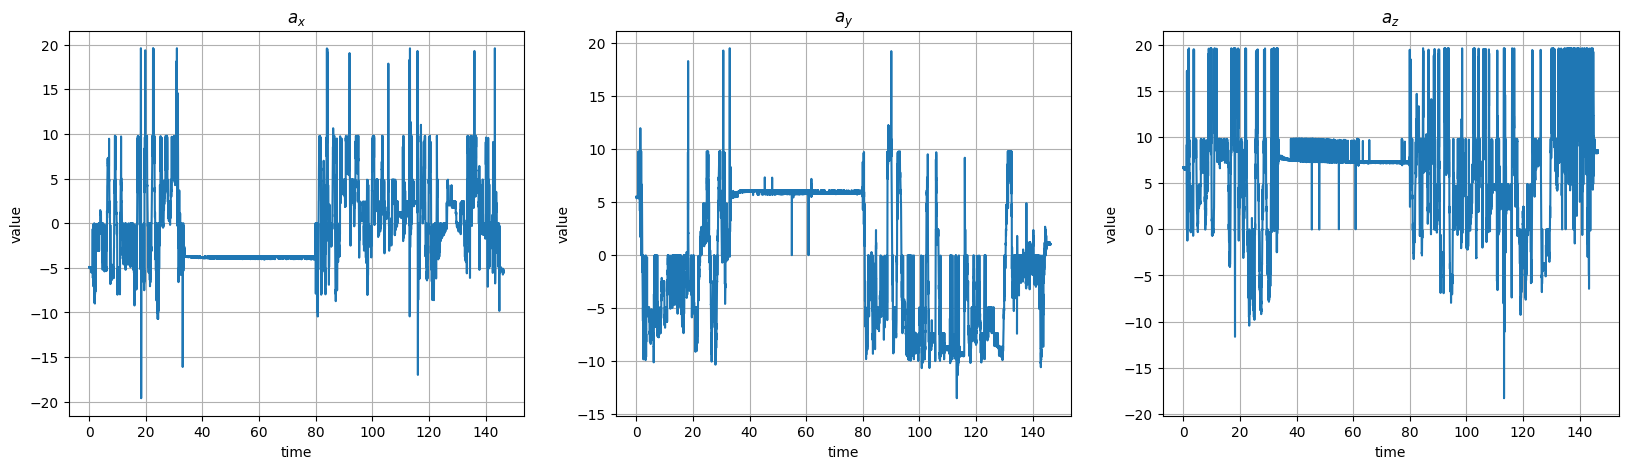

In [58]:
plotData(tData, {
    'a_x': [ax for (ax, ay, az) in aData],
    'a_y': [ay for (ax, ay, az) in aData],
    'a_z': [az for (ax, ay, az) in aData],
})

- Aplicando Filtro Passa Faixa

TransferFunction(array([23.87610417,  0.        ]), array([ 1.        , 23.87610417, 31.58273408]))

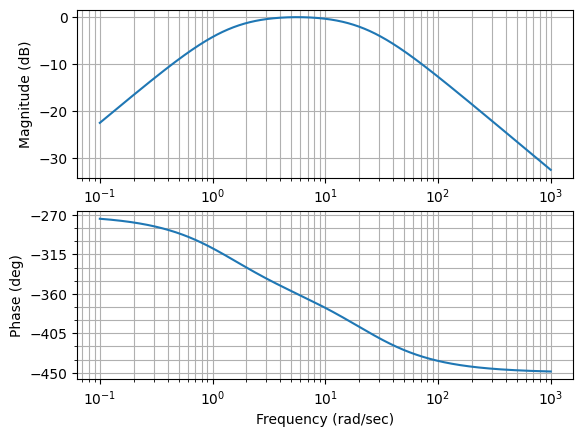

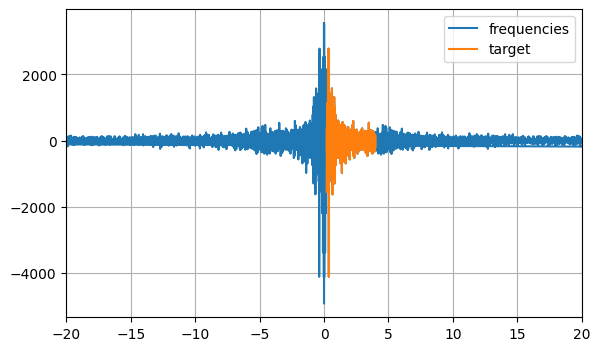

In [60]:
target = (0.2, 4)
filter = BandFilter(dt, target)
filter.plot()
NumpyFilter().see([ax for (ax, ay, az) in aData], dt, target, range=(-20, 20))

In [61]:
print(filter.getOut() + ';')

Xn*(0.192252) + Xn1*(0.000000) + Xn2*(-0.192252) + Yn1*(1.605324) + Yn2*(-0.615497);


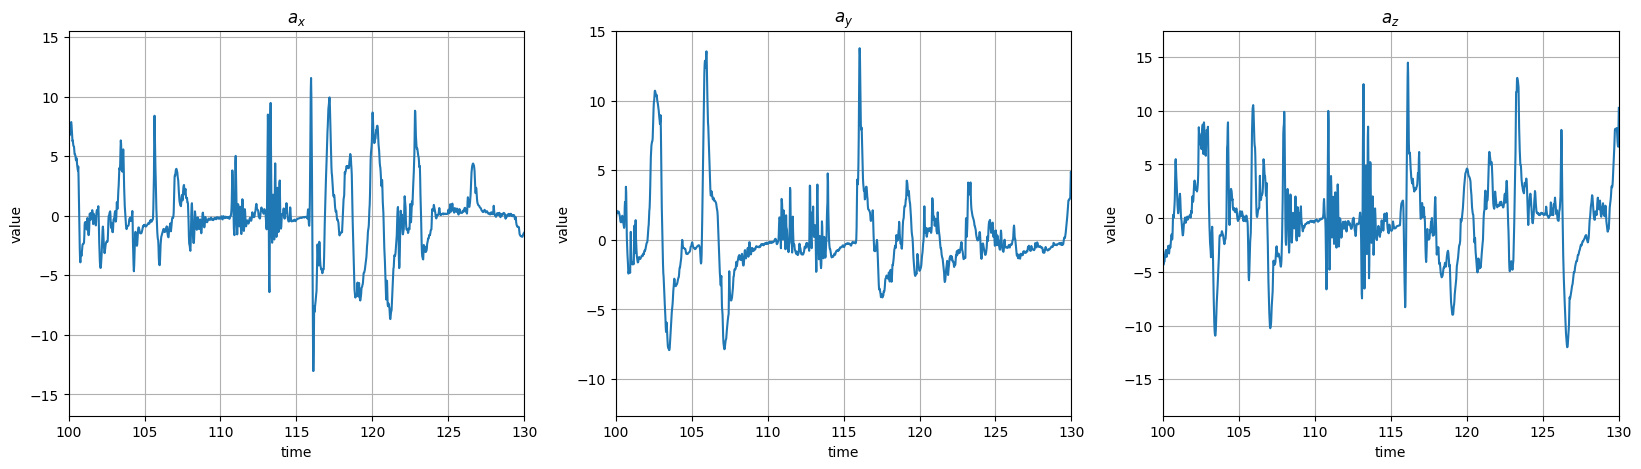

In [62]:
aData = np.column_stack([
    filter.apply([ax for (ax, ay, az) in aData]),
    filter.apply([ay for (ax, ay, az) in aData]),
    filter.apply([az for (ax, ay, az) in aData])
])

plotData(tData, {
    'a_x': [ax for (ax, ay, az) in aData],
    'a_y': [ay for (ax, ay, az) in aData],
    'a_z': [az for (ax, ay, az) in aData],
}, range=(100, 130))

### Velocidade Linear

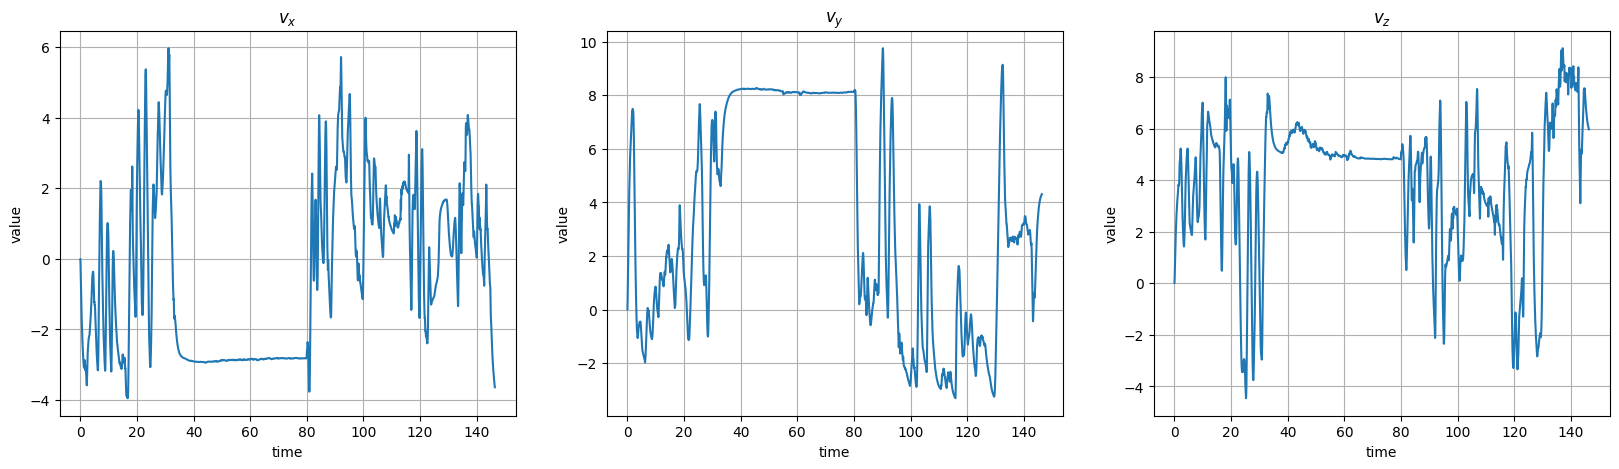

In [63]:
vData = np.column_stack([
    Integral(dt).apply([ax for (ax, ay, az) in aData]),
    Integral(dt).apply([ay for (ax, ay, az) in aData]),
    Integral(dt).apply([az for (ax, ay, az) in aData])
])

plotData(tData, {
    'v_x': [vx for (vx, vy, vz) in vData],
    'v_y': [vy for (vx, vy, vz) in vData],
    'v_z': [vz for (vx, vy, vz) in vData],
})

### Posição Linear

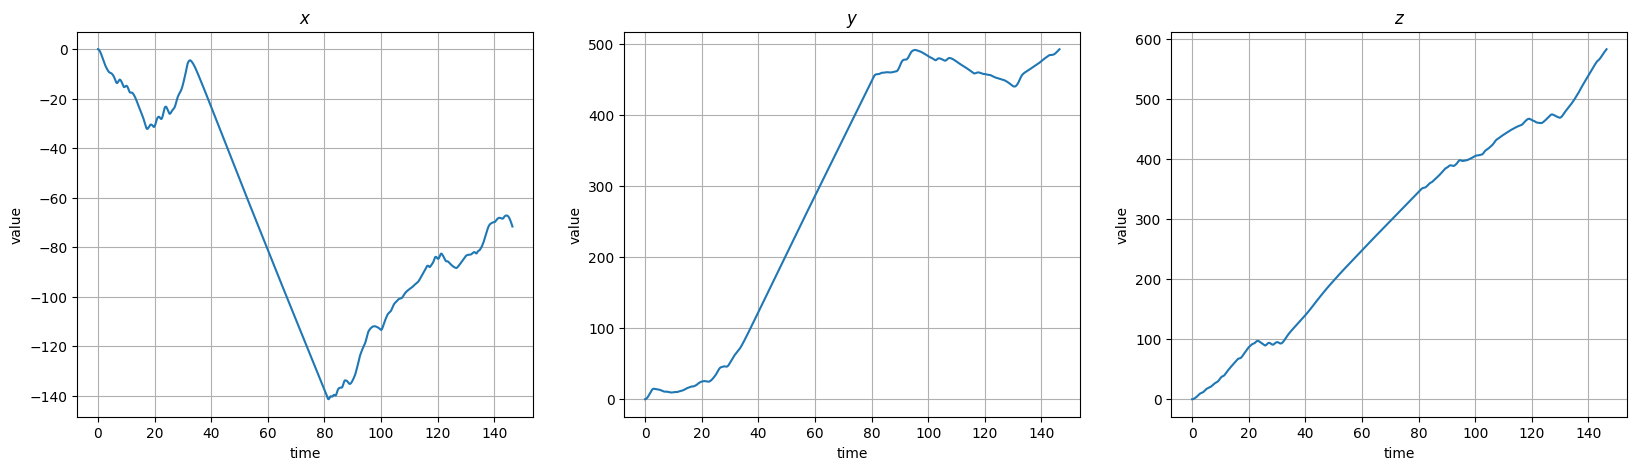

In [64]:
xData = np.column_stack([
    Integral(dt).apply([vx for (vx, vy, vz) in vData]),
    Integral(dt).apply([vy for (vx, vy, vz) in vData]),
    Integral(dt).apply([vz for (vx, vy, vz) in vData])
])

plotData(tData, {
    'x': [x for (x, y, z) in xData],
    'y': [y for (x, y, z) in xData],
    'z': [z for (x, y, z) in xData],
})

# ÂNGULAÇÃO

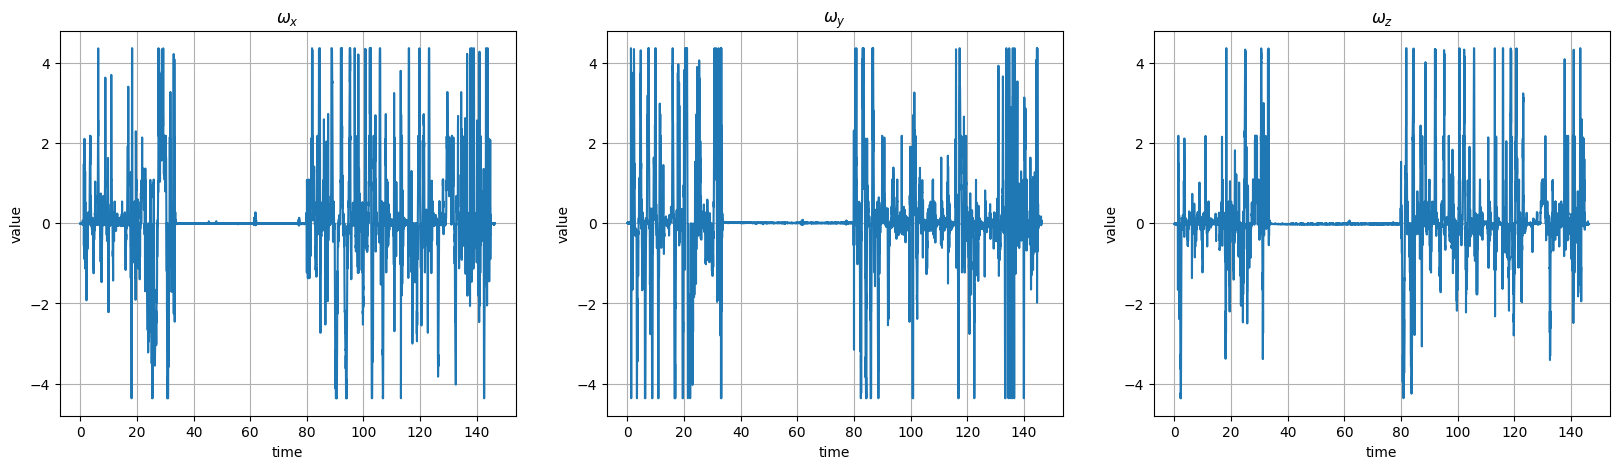

In [65]:
plotData(tData, {
    '\omega_x': [wx for (wx, wy, wz) in wData],
    '\omega_y': [wy for (wx, wy, wz) in wData],
    '\omega_z': [wz for (wx, wy, wz) in wData],
})

### Filtro Passa Baixa

TransferFunction(array([39.4784176]), array([ 1.        ,  8.88576588, 39.4784176 ]))

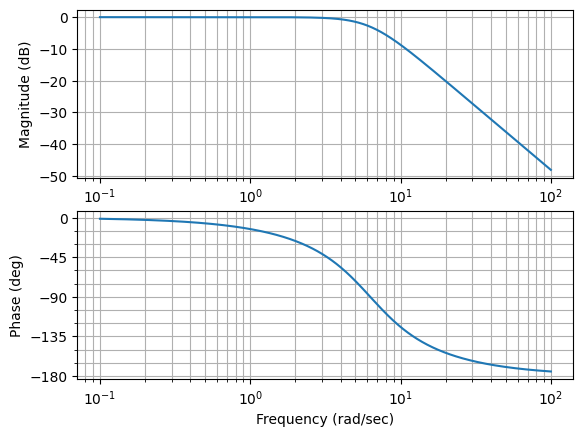

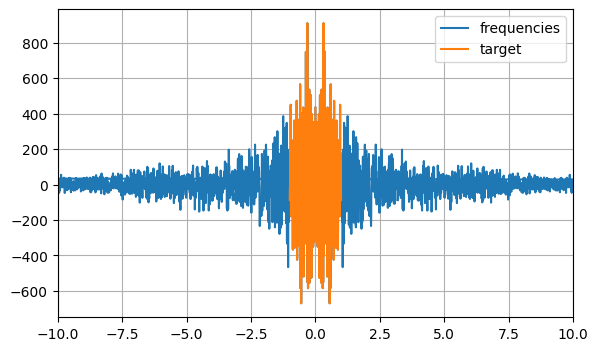

In [66]:
fc = 1
filter = LowBandFilter(f_c=fc, dt=dt)
filter.plot()
NumpyFilter().see([wx for (wx, wy, wz) in wData], dt, limits=(-fc, fc), range=(-10, 10))

In [67]:
print(filter.getOut() + ';')

Xn*(0.003613) + Xn1*(0.007225) + Xn2*(0.003613) + Yn1*(1.822927) + Yn2*(-0.837377);


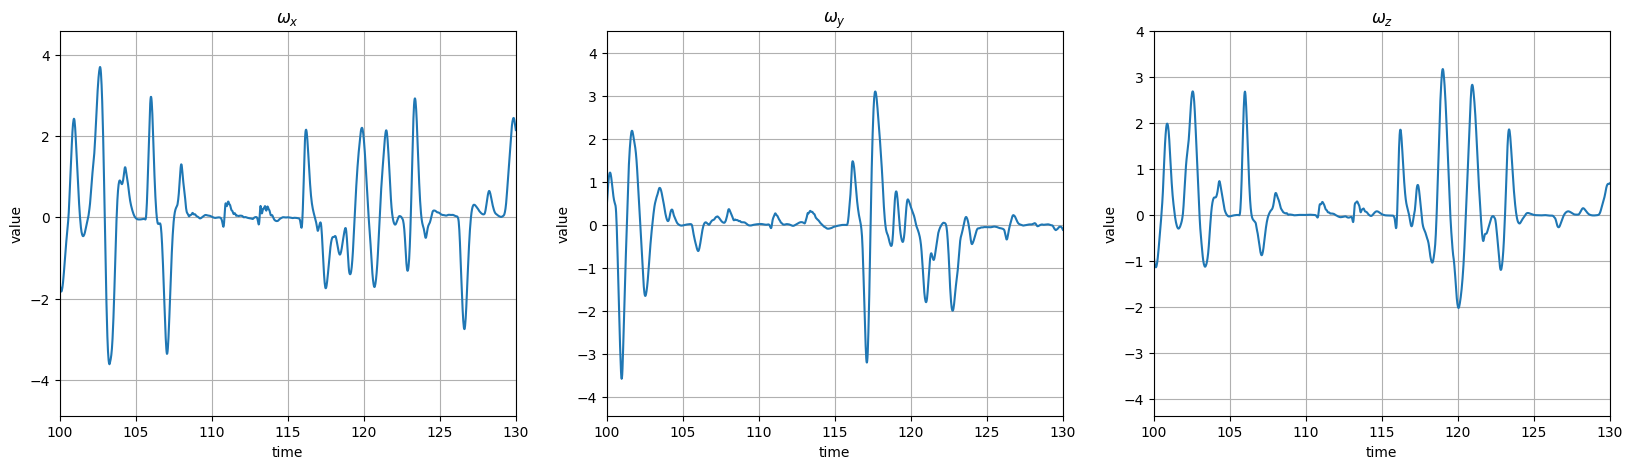

In [68]:
wData = np.column_stack([
    filter.apply([wx for (wx, wy, wz) in wData]),
    filter.apply([wy for (wx, wy, wz) in wData]),
    filter.apply([wz for (wx, wy, wz) in wData])
])

plotData(tData, {
    '\omega_x': [wx for (wx, wy, wz) in wData],
    '\omega_y': [wy for (wx, wy, wz) in wData],
    '\omega_z': [wz for (wx, wy, wz) in wData],
}, range=(100, 130))

### Ângulo (integração)

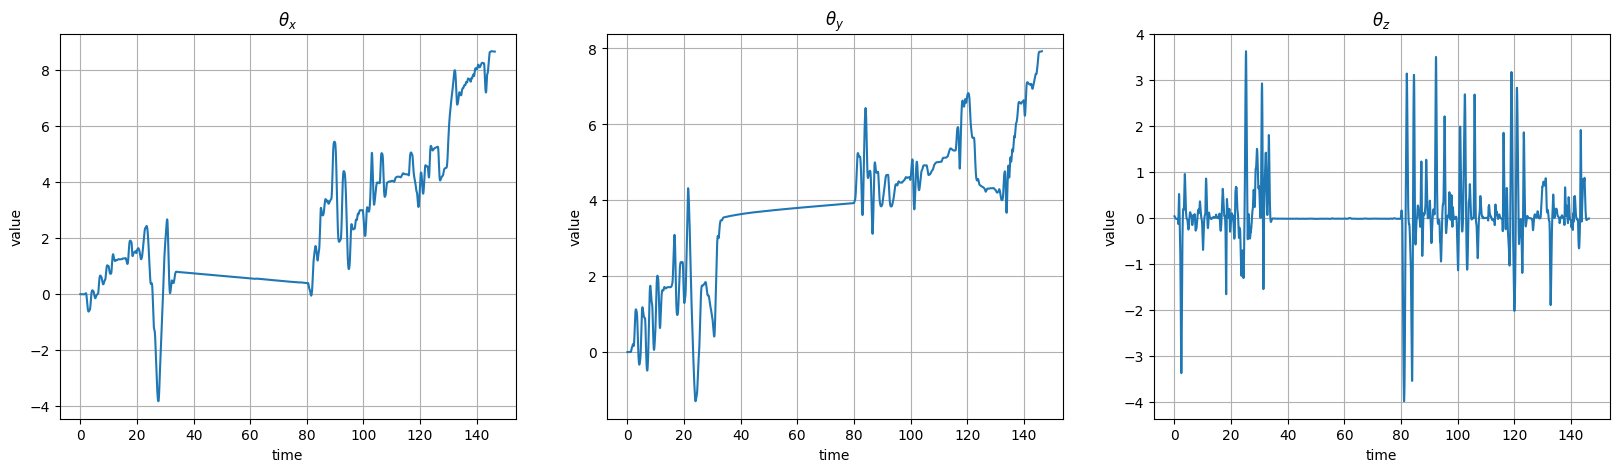

In [69]:
oData = np.column_stack([
    Integral(dt).apply([wx for (wx, wy, wz) in wData]),
    Integral(dt).apply([wy for (wx, wy, wz) in wData]),
    Integral(dt).apply([wz for (wx, wy, wz) in wData])
])

plotData(tData, {
    r'\theta_x': [ox for (ox, oy, oz) in oData],
    r'\theta_y': [oy for (ox, oy, oz) in oData],
    r'\theta_z': [oz for (ox, oy, oz) in wData],
})

### Campo Vetorial

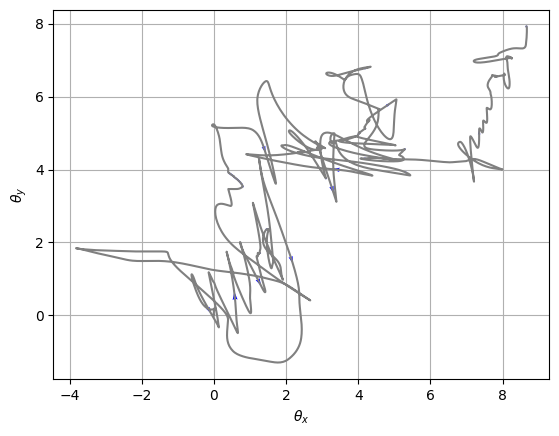

In [70]:
indices = np.linspace(0, len(oData)-1, 40, dtype=int)
x = np.array([ox for (ox, oy, oz) in oData])[indices]
y = np.array([oy for (ox, oy, oz) in oData])[indices]
u = np.array([wx for (wx, wy, wz) in wData])[indices]
v = np.array([wy for (wx, wy, wz) in wData])[indices]

plt.plot([ox for (ox, oy, oz) in oData], [oy for (ox, oy, oz) in oData], color='gray')
plt.quiver(x, y, u, v, angles='xy', scale_units='xy', scale=15, width=0.004, color='blue')
plt.xlabel(r'$\theta_x$'), plt.ylabel(r'$\theta_y$'), plt.grid()
plt.show()

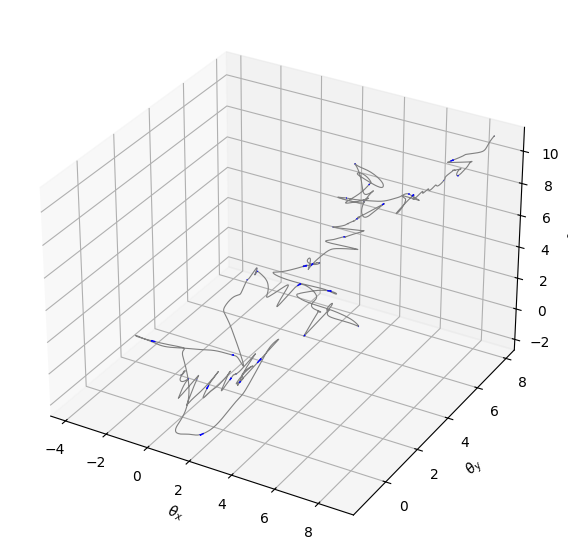

In [71]:
fig = plt.figure(figsize=(7, 7))
ax  = fig.add_subplot(111, projection='3d')
indices = np.linspace(0, len(oData)-1, 50, dtype=int)

x = np.array([ox for (ox, oy, oz) in oData])[indices]
y = np.array([oy for (ox, oy, oz) in oData])[indices]
z = np.array([oz for (ox, oy, oz) in oData])[indices]

u = np.array([wx for (wx, wy, wz) in wData])[indices]
v = np.array([wy for (wx, wy, wz) in wData])[indices]
w = np.array([wz for (wx, wy, wz) in wData])[indices]

plt.plot([ox for (ox, oy, oz) in oData], [oy for (ox, oy, oz) in oData], [oz for (ox, oy, oz) in oData], lw=0.8, color='gray')
ax.quiver(x, y, z, u, v, w, length=0.08, normalize=False, color='blue', linewidth=1)
ax.set_xlabel(r'$\theta_x$'), ax.set_ylabel(r'$\theta_y$'), ax.set_zlabel(r'$\theta_z$')
plt.show()

# ROW, PITCH, YAW

In [72]:
import math

def sign(x):
    return 1 if x >= 0 else -1

class Quaternions:
    def __init__(self):
        self.q = np.array([1.0, 0.0, 0.0, 0.0])
        self.pitch = self.roll = self.yaw = 0

    def product(self, q1, q2):
        w1, x1, y1, z1 = q1.data
        w2, x2, y2, z2 = q2.data

        w = w1*w2 - x1*x2 - y1*y2 - z1*z2
        x = w1*x2 + x1*w2 + y1*z2 - z1*y2
        y = w1*y2 - x1*z2 + y1*w2 + z1*x2
        z = w1*z2 + x1*y2 - y1*x2 + z1*w2
        return np.array([w, x, y, z])
    
    def euler(self, qData):
        q0, q1, q2, q3 = qData.data
        # Roll (x-axis rotation)
        sinr_cosp = 2 * (q0 * q1 + q2 * q3)
        cosr_cosp = 1 - 2 * (q1**2 + q2**2)
        roll = math.atan2(sinr_cosp, cosr_cosp)
        
        # Pich (y-axis rotation)
        sinp  = 2*(q0 * q2 - q3 * q1)
        pitch = sign(sinp)*(math.pi/2) if abs(sinp) >= 1 else math.asin(sinp)

        # Yaw (z-axis rotation)
        siny_cosp = 2 * (q0 * q3 + q1 * q2)
        cosy_cosp = 1 - 2 * (q2**2 + q3**2)
        yaw = math.atan2(siny_cosp, cosy_cosp)
        return (pitch, roll, yaw)

    def fromOmega(self, wx, wy, wz):
        omega = np.array([0.0, wx, wy, wz])
        q_dot = self.product(self.q, omega)
        self.q = q_dot*0.5*dt + self.q
        self.q = self.q / np.linalg.norm(self.q)

    def fromAccel(self, ax, ay, az):
        ax, ay, az = np.array([ax, ay, az]).norm().data
        pitch = math.atan2(-ax, math.sqrt(ay**2 + az**2))
        roll  = math.atan2(ay, az)
        yaw   = 0  # sem magnetômetro
        
        qroll  = np.array([math.cos(roll/2),  math.sin(roll/2), 0, 0])
        qpitch = np.array([math.cos(pitch/2), 0, math.sin(pitch/2), 0])
        qyaw   = np.array([math.cos(yaw/2),   0, 0, math.sin(yaw/2)])

        #q = q_yaw ⊗ (q_pitch ⊗ q_roll)
        q_temp = self.product(qpitch, qroll)
        return self.product(qyaw, q_temp)
    
    def update(self, ax, ay, az, wx, wy, wz):    
        self.fromOmega(wx, wy, wz)
        #self.fromAccel(ax, ay, az)
        self.pitch, self.roll, self.yaw = self.euler(self.q)


q = Quaternions()

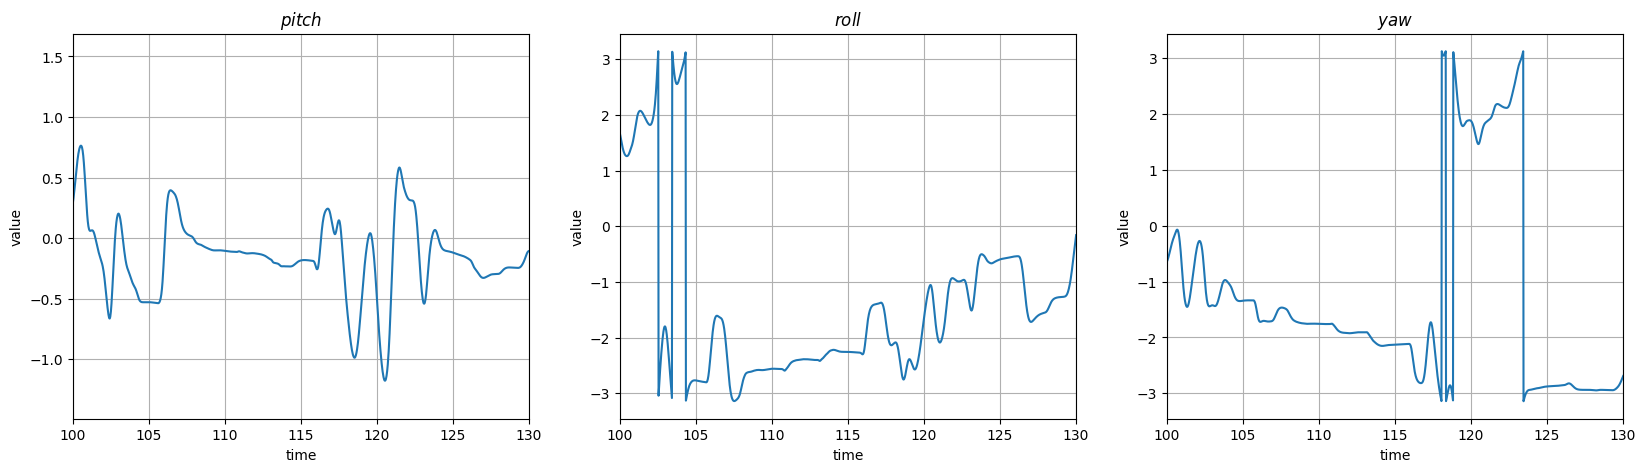

In [73]:
eulerData = []

for a, w in zip(aData, wData):
    ax, ay, az = a 
    wx, wy, wz = w 
    q.update(ax, ay, az, wx, wy, wz)
    eulerData.append([q.pitch, q.roll, q.yaw])


plotData(tData, {
    r'pitch': [pitch for (pitch, roll, yaw) in eulerData],
    r'roll' : [roll for (pitch, roll, yaw) in eulerData],
    r'yaw'  : [yaw for (pitch, roll, yaw) in eulerData],
}, range=(100, 130))